In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict

In [136]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd '/content/gdrive/MyDrive'


Mounted at /content/gdrive/
/content/gdrive/MyDrive


In [137]:
data_compact=pd.read_csv("./Dataset/Dataset2/Compact.csv")
data_skewed=pd.read_csv("./Dataset/Dataset2/Skewed.csv")
data_subcluster=pd.read_csv("./Dataset/Dataset2/Subclusters.csv")
data_wellSeperated=pd.read_csv("./Dataset/Dataset2/wellSeperated.csv")
outliers={}
s_scores=defaultdict(list)

In [138]:
data_compact


x1         x2
0   -50.298667  31.489949
1   -45.591237  35.838229
2   -52.628892  35.305813
3   -52.813231  36.767548
4   -48.468811  29.755084
..         ...        ...
395   7.280400 -28.095825
396   5.417914 -25.709368
397   5.332784 -29.247372
398  10.450552 -28.943048
399   6.174490 -28.947327

[400 rows x 2 columns]

In [139]:
data_skewed

x1         x2
0    -0.450040  11.207204
1    -1.065648  -1.923373
2     0.829499  -1.000498
3    -1.551968   7.645688
4    -2.721162   1.393759
..         ...        ...
920   8.741722  -7.770710
921  11.659674 -12.801774
922  10.228386 -12.195185
923   8.244155  -9.419570
924  11.316753  -9.574117

[925 rows x 2 columns]

In [140]:
data_subcluster

x1         x2
0   -14.952995  -0.285601
1   -17.406881   3.495200
2   -14.122142   0.712242
3   -16.968327  -0.860050
4   -15.837062   4.610789
..         ...        ...
395  25.477087  10.963249
396  26.694292  11.276599
397  28.137247  14.511407
398  22.612999  12.285449
399  26.423680  11.158612

[400 rows x 2 columns]

In [141]:
data_wellSeperated

x1          x2
0    516.012706  393.014514
1    436.211762  408.656585
2    512.052601  372.022014
3    489.140464  401.807159
4    446.207986  338.516682
..          ...         ...
330  638.916471  323.569096
331  542.005901  347.527070
332  611.964612  377.254978
333  520.654168  455.996453
334  594.479314  392.901455

[335 rows x 2 columns]

#DATA COMAPCT

The cluster are compact hence for k=5 kmeans and DB SCAN Algo perform best

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

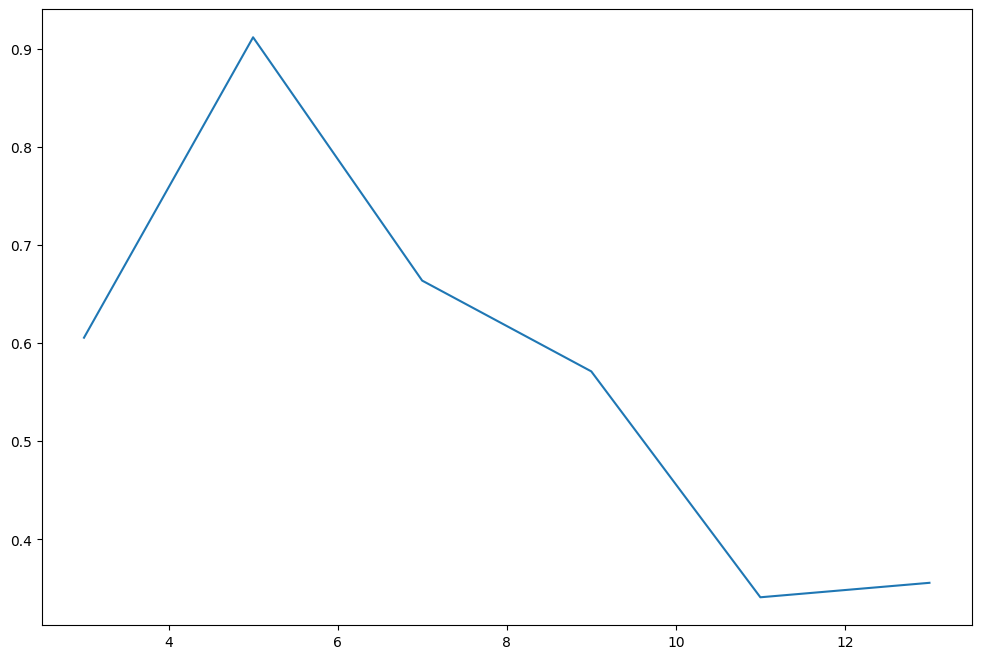

In [142]:
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_compact)
  score.append(metrics.silhouette_score(data_compact,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


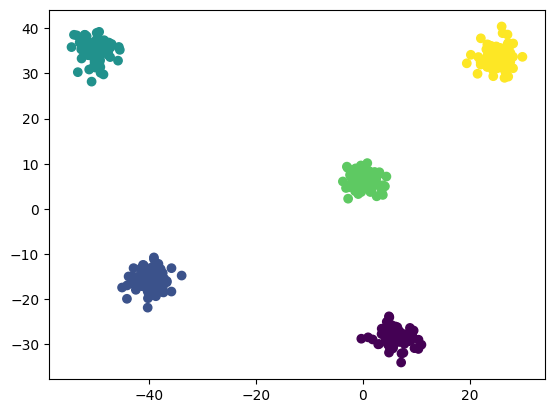

In [143]:
kmeans = KMeans(n_clusters=5,init='random',random_state=42).fit(data_compact)
s_scores['kmeans'].append(metrics.silhouette_score(data_compact,kmeans.labels_))
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(data_compact['x1'],data_compact['x2'],c=kmeans.labels_)
plt.show()

In [144]:
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering(X,link):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage=link)
    model = model.fit(X)
    return model
def getCounts(model):
    counts = np.empty(model.children_.shape[0])

    n_samples = len(model.labels_)
    indx=0
    for merge in model.children_:
        current_count = 0
        for nodes in merge:
            if nodes < n_samples:
                current_count += 1
            else:
                n_idx=nodes - n_samples
                current_count += counts[n_idx]
        counts[indx] = current_count
        indx+=1
    return counts
def dendogram(X,link="ward"):
    model=hierarchical_clustering(X,link)

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_,getCounts(model)]
    ).astype(float)
    plt.figure(figsize=(10,10))
    hierarchy.dendrogram(linkage_matrix)
    plt.title("Hierarchical Clustering Dendrogram")

    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()


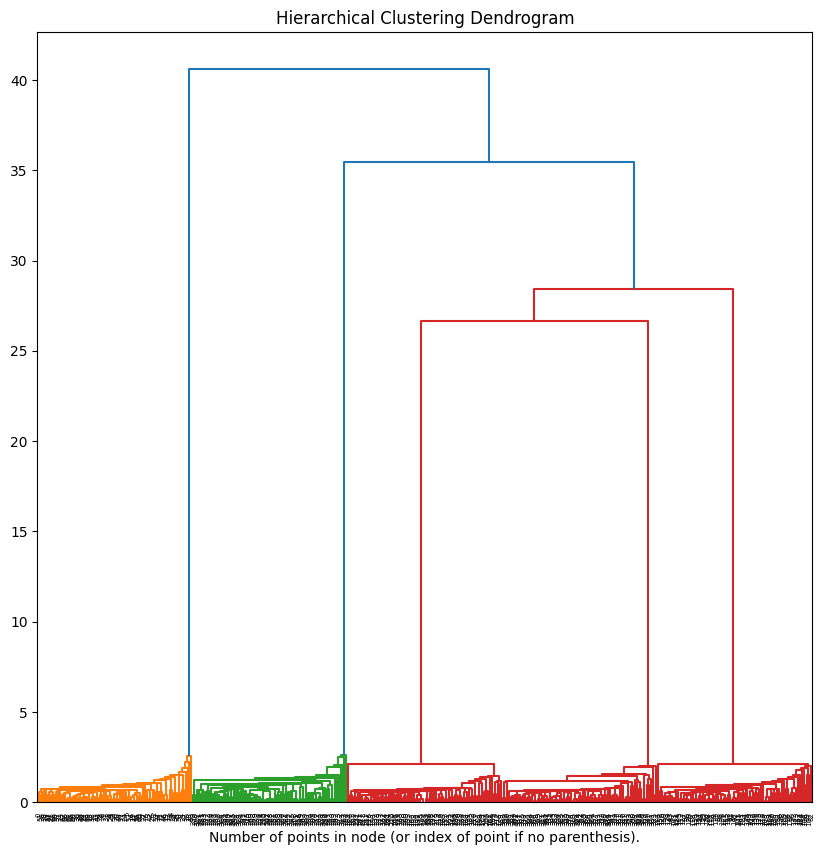

In [145]:
dendogram(data_compact,link="single")

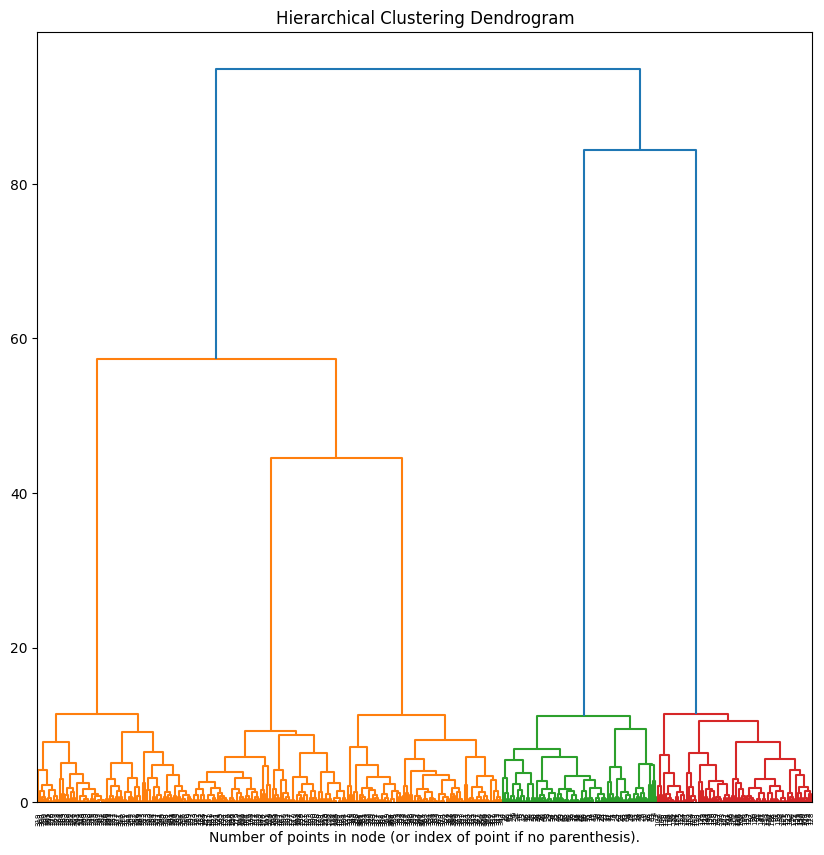

In [146]:
dendogram(data_compact,link="complete")

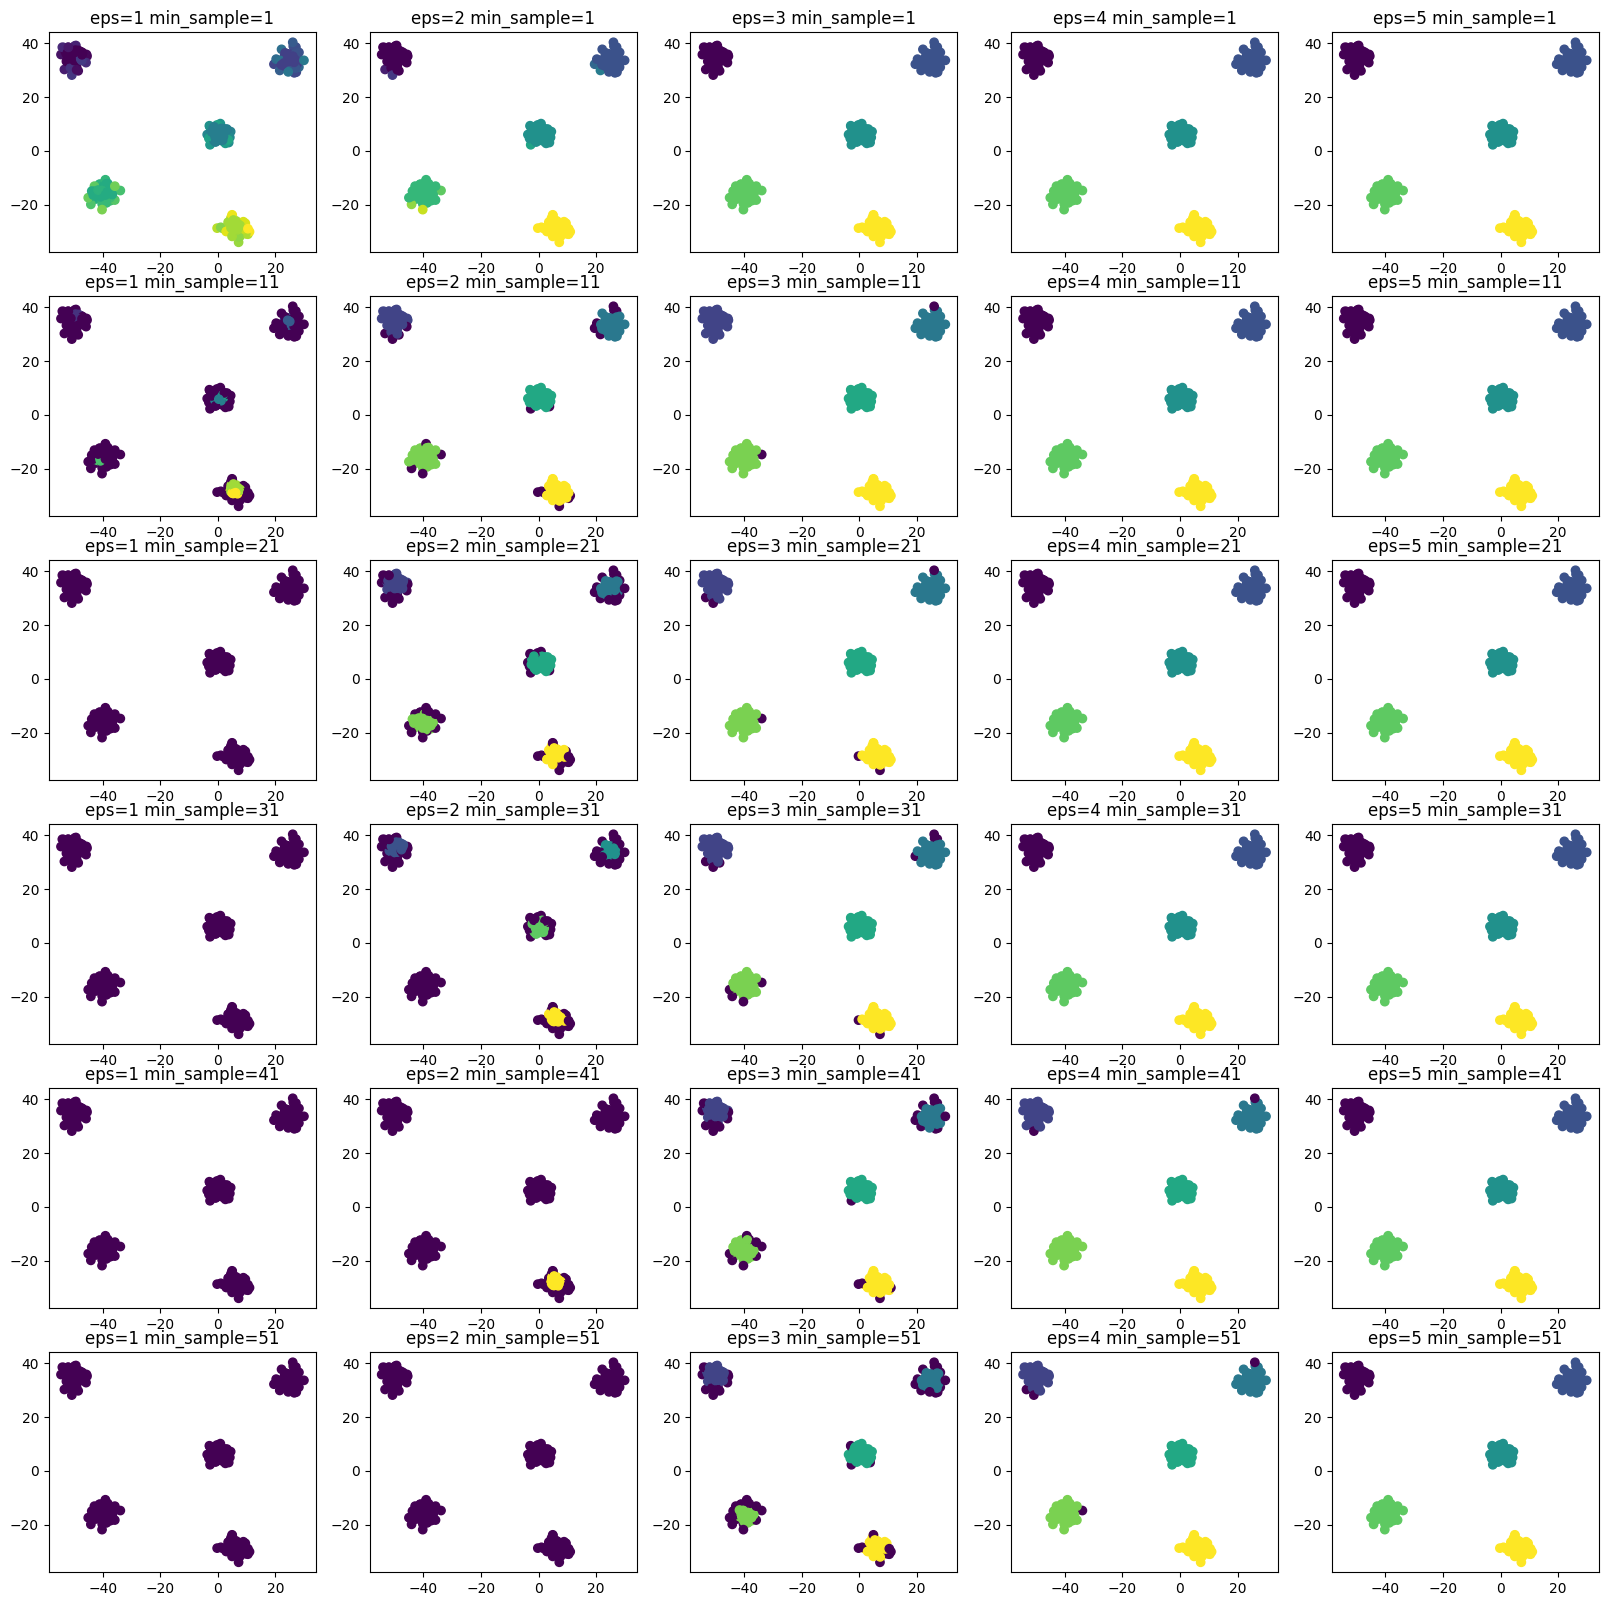

In [147]:
from sklearn.cluster import DBSCAN
ep=[1,2,3,4,5]
min_s=[1,11,21,31,41,51]
f, ax=plt.subplots(6,5,figsize=(20,20))
for idx1,i in enumerate(ep):
  for idx2,j in enumerate(min_s):

    clustering = DBSCAN(eps=i, min_samples=j).fit(data_compact)
    ax[idx2][idx1].scatter(data_compact['x1'],data_compact['x2'],c=clustering.labels_)
    ax[idx2][idx1].set_title("eps="+str(i)+" min_sample="+str(j))
plt.show()

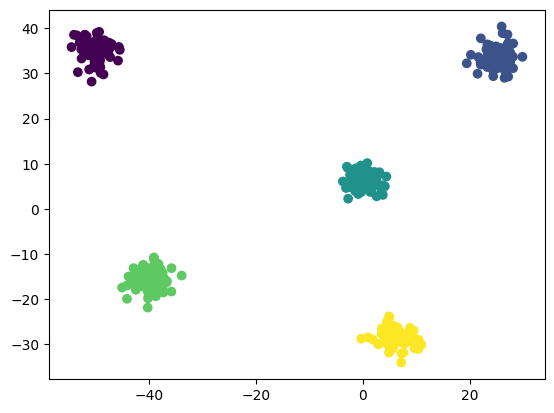

In [148]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=5).fit(data_compact)
fig = plt.figure()
s_scores['dbscan'].append(metrics.silhouette_score(data_compact,clustering.labels_))
ax = fig.add_subplot()
ax.scatter(data_compact['x1'],data_compact['x2'],c=clustering.labels_)
plt.show()
from collections import Counter
outliers['data_compact']=Counter(clustering.labels_)[-1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

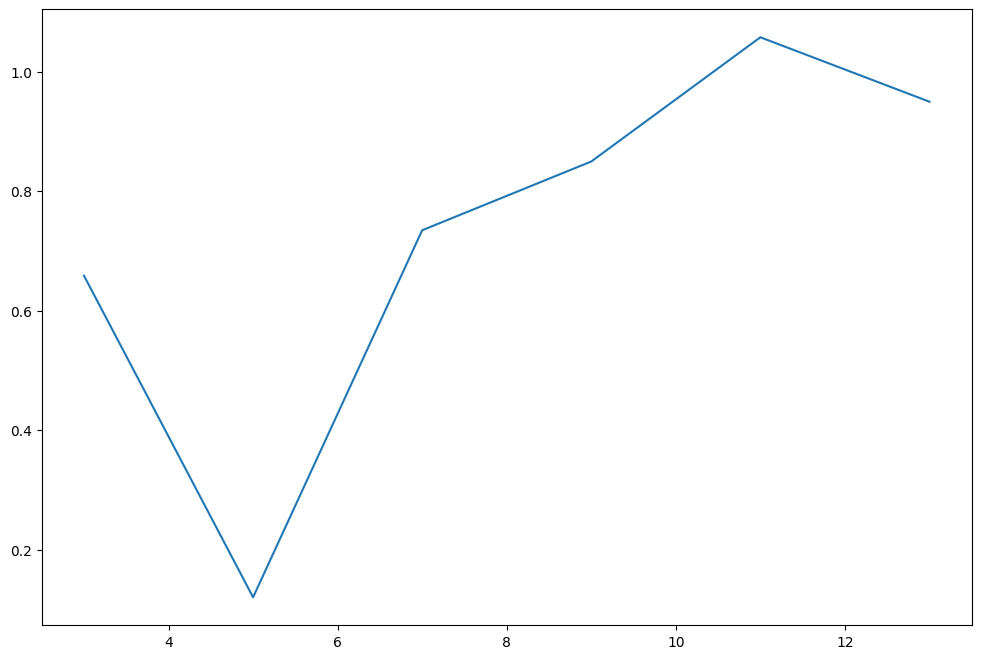

In [149]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_compact)
  score.append(davies_bouldin_score(data_compact,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

#DATA SKEWED

The cluster is skewed DB SCAN Algo perform best as some dense cluster can be identified in a better way

**Silhouette Score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

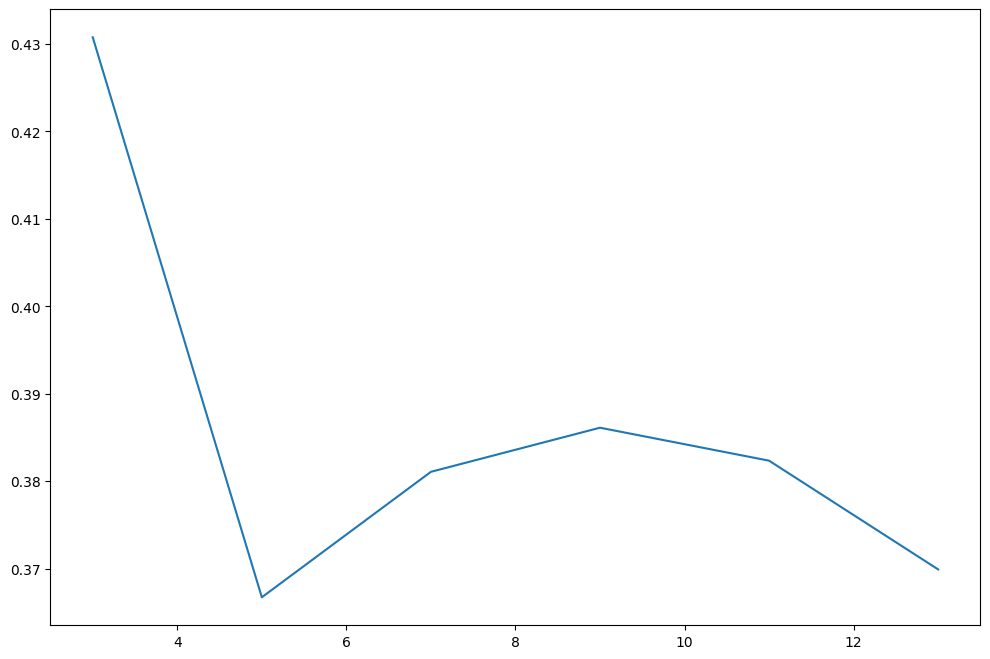

In [150]:
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_skewed)
  score.append(metrics.silhouette_score(data_skewed,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


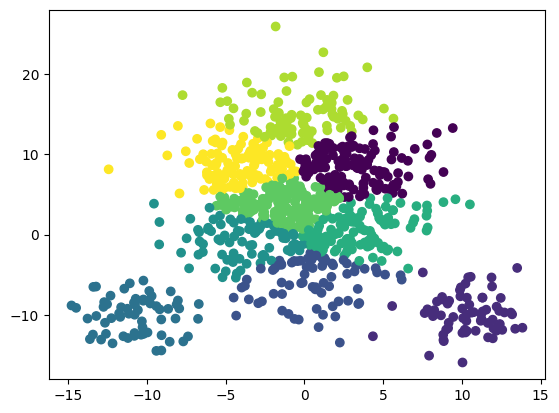

In [175]:
kmeans = KMeans(n_clusters=9,init='random',random_state=42).fit(data_skewed)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['kmeans'].append(metrics.silhouette_score(data_skewed,kmeans.labels_))
ax.scatter(data_skewed['x1'],data_skewed['x2'],c=kmeans.labels_)
plt.show()

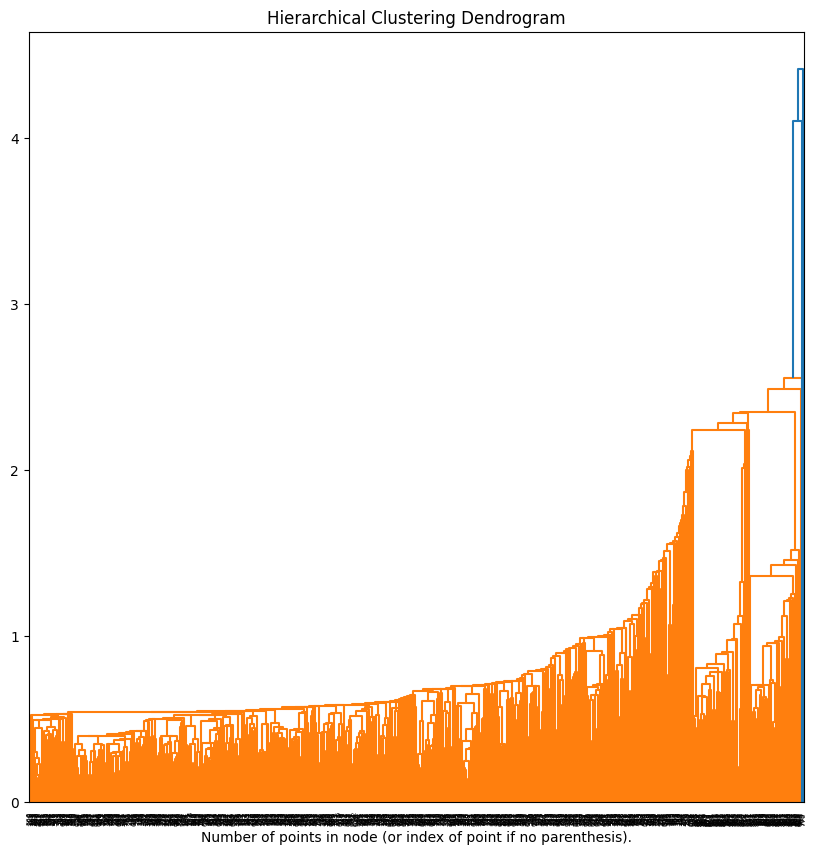

In [152]:
dendogram(data_skewed,link="single")

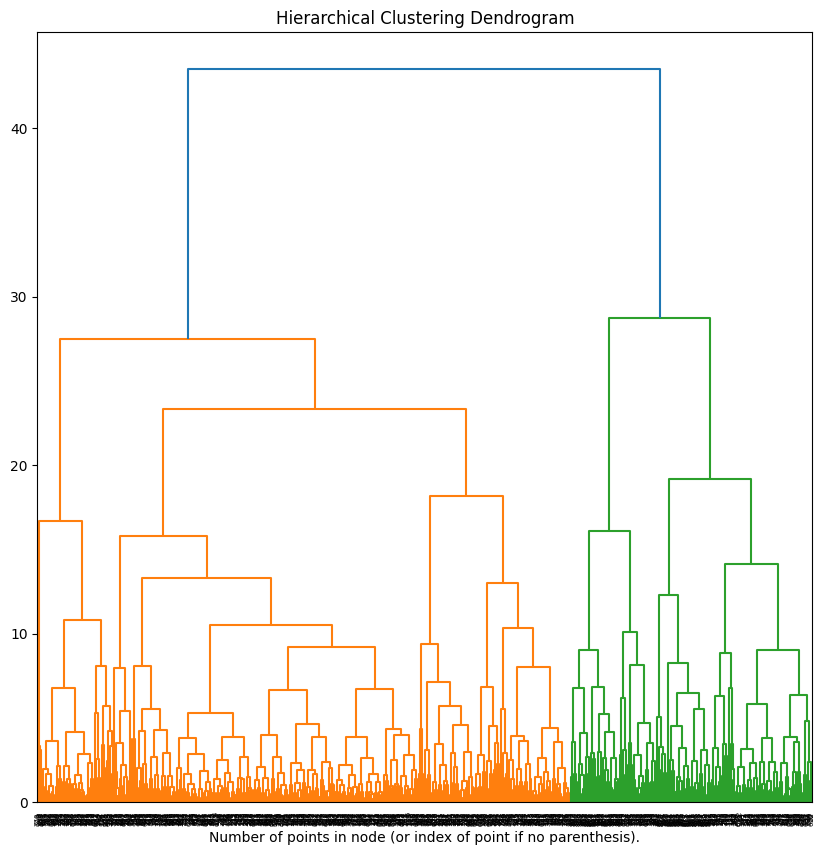

In [153]:
dendogram(data_skewed,link="complete")

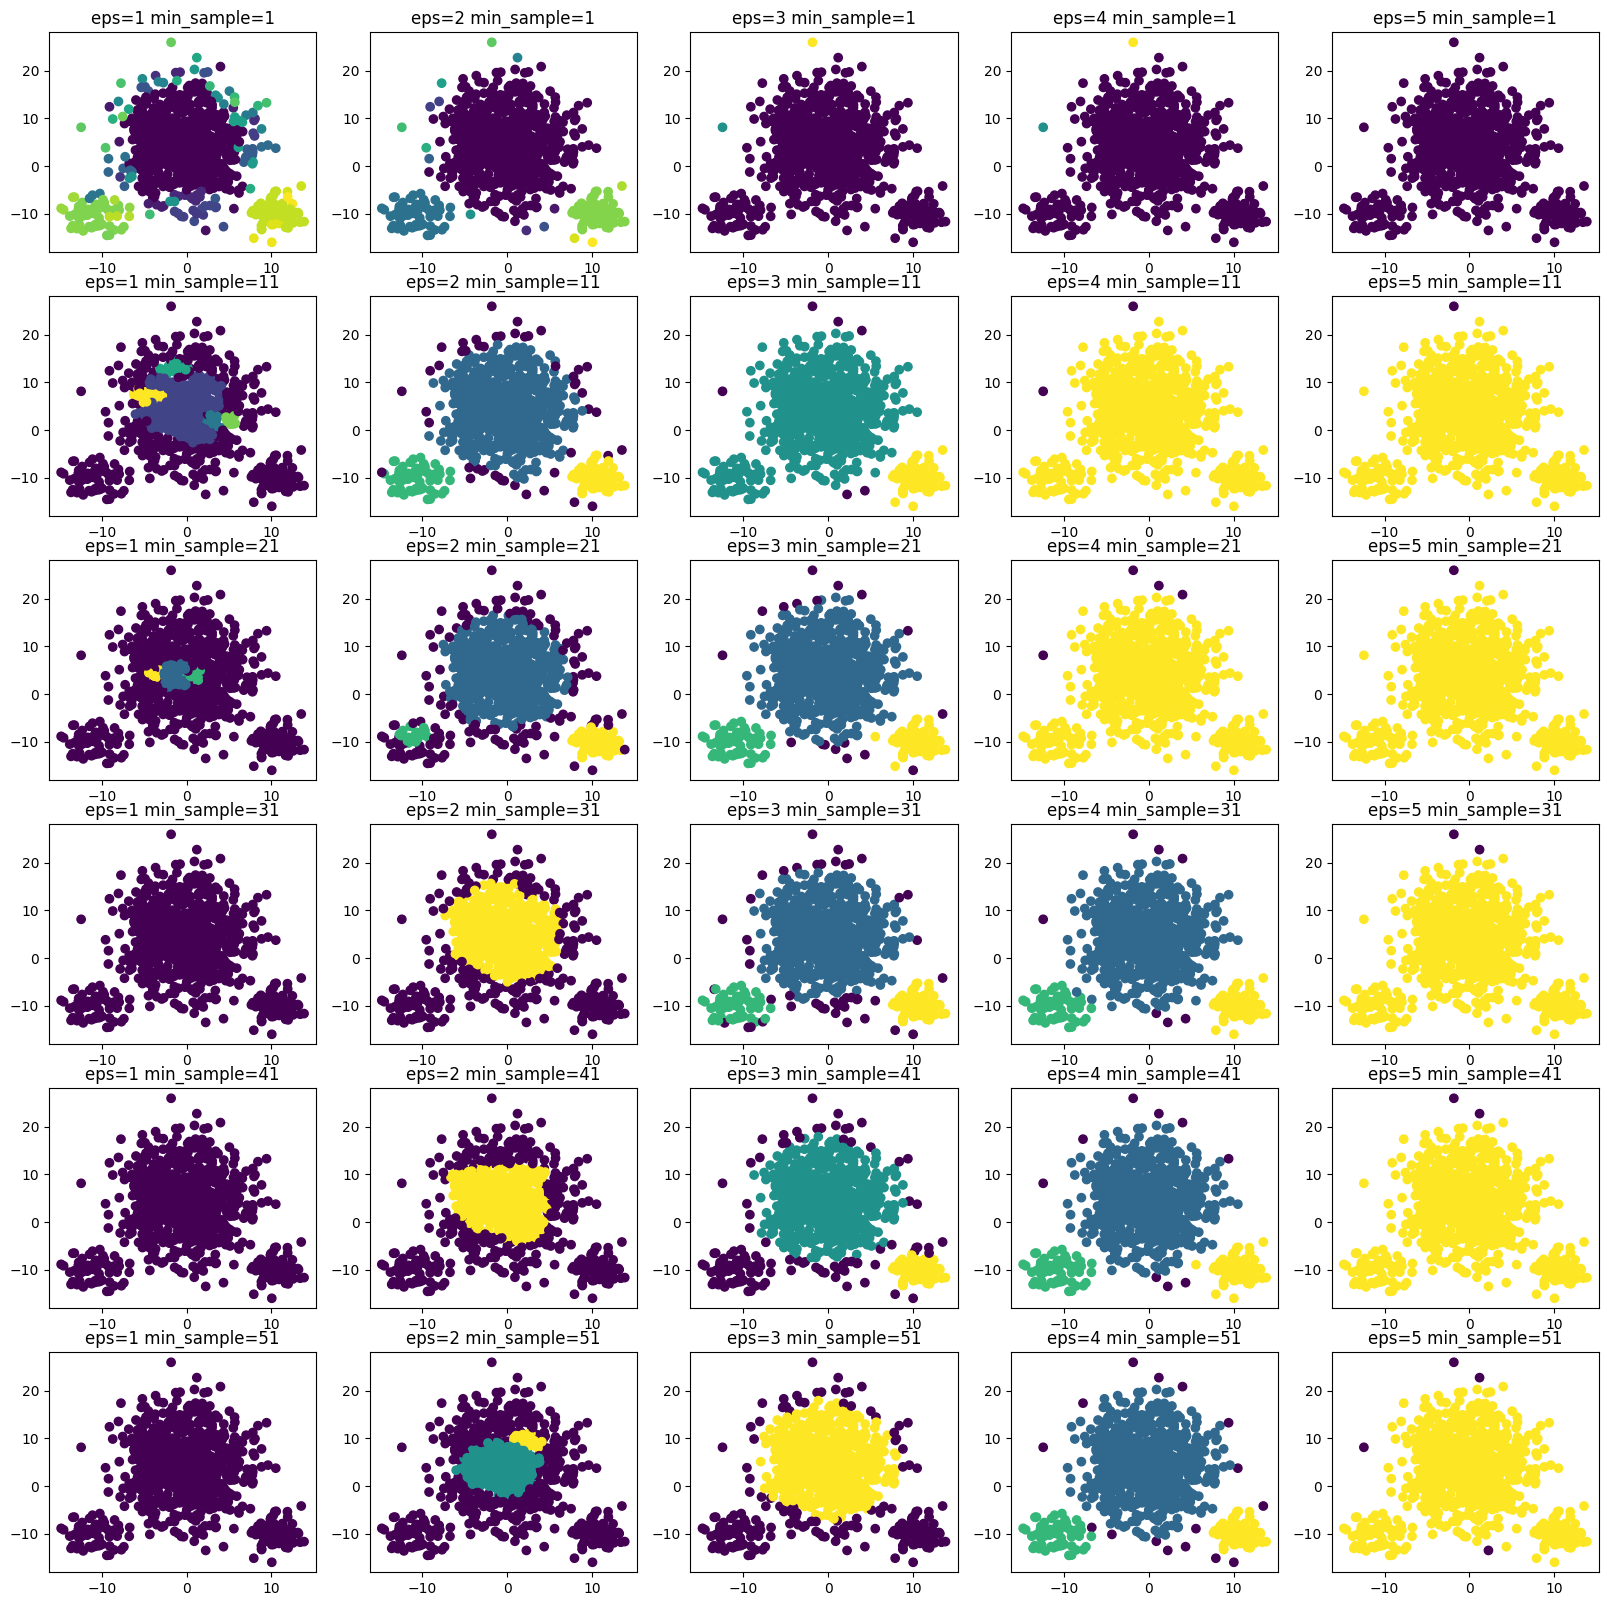

In [154]:
from sklearn.cluster import DBSCAN
ep=[1,2,3,4,5]
min_s=[1,11,21,31,41,51]
f, ax=plt.subplots(6,5,figsize=(20,20))
for idx1,i in enumerate(ep):
  for idx2,j in enumerate(min_s):

    clustering = DBSCAN(eps=i, min_samples=j).fit(data_skewed)
    ax[idx2][idx1].scatter(data_skewed['x1'],data_skewed['x2'],c=clustering.labels_)
    ax[idx2][idx1].set_title("eps="+str(i)+" min_sample="+str(j))
plt.show()

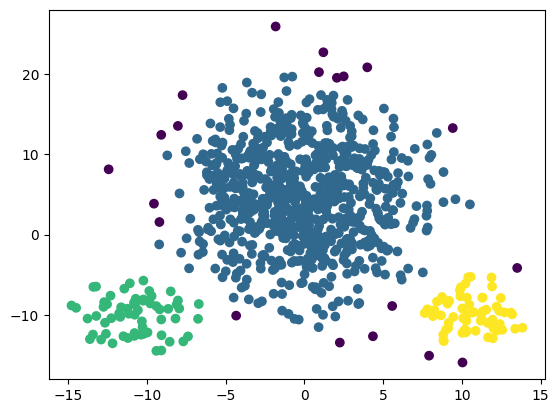

In [155]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=5).fit(data_skewed)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['dbscan'].append(metrics.silhouette_score(data_skewed,clustering.labels_))
ax.scatter(data_skewed['x1'],data_skewed['x2'],c=clustering.labels_)
plt.show()
from collections import Counter
outliers['data_skewed']=Counter(clustering.labels_)[-1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

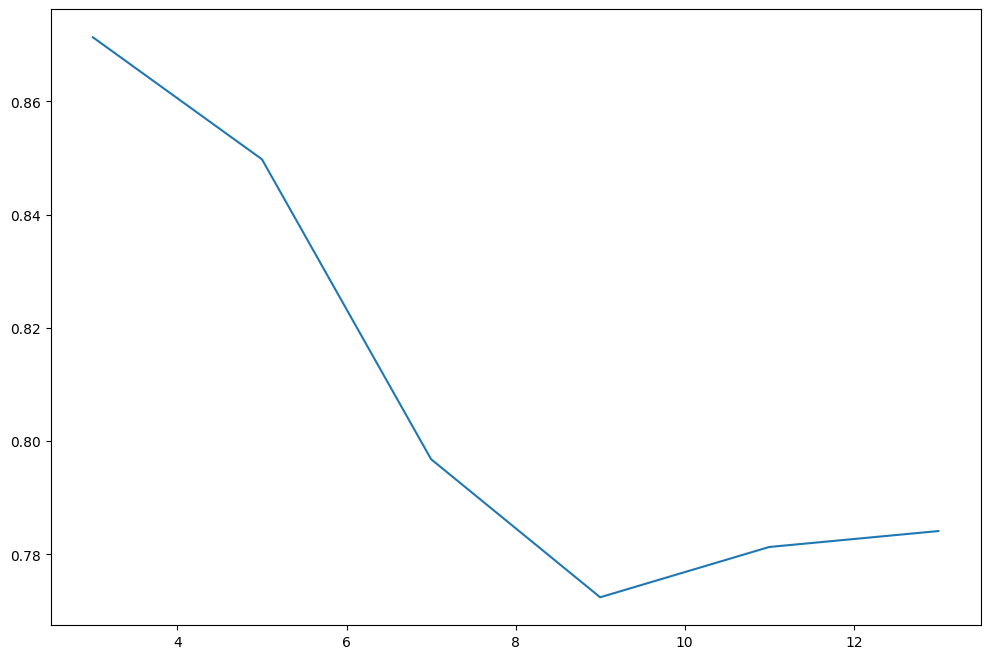

In [156]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_skewed)
  score.append(davies_bouldin_score(data_skewed,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

#DATA SUBCLUSTER

Kmeans k=5 performed better while dbscan performace was also not bad

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

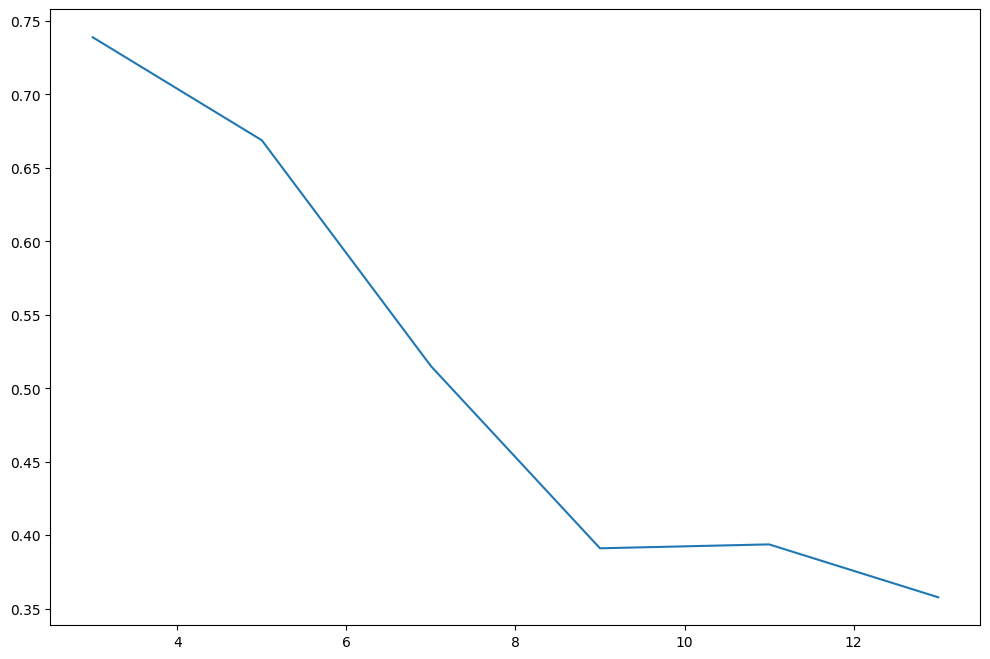

In [157]:
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_subcluster)
  score.append(metrics.silhouette_score(data_subcluster,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


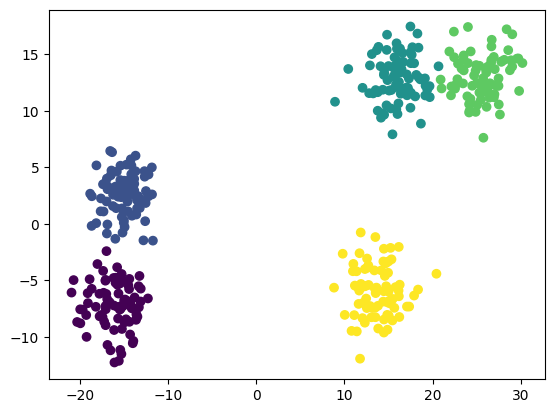

In [158]:
kmeans = KMeans(n_clusters=5,init='random',random_state=42).fit(data_subcluster)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['kmeans'].append(metrics.silhouette_score(data_subcluster,kmeans.labels_))
ax.scatter(data_subcluster['x1'],data_subcluster['x2'],c=kmeans.labels_)
plt.show()

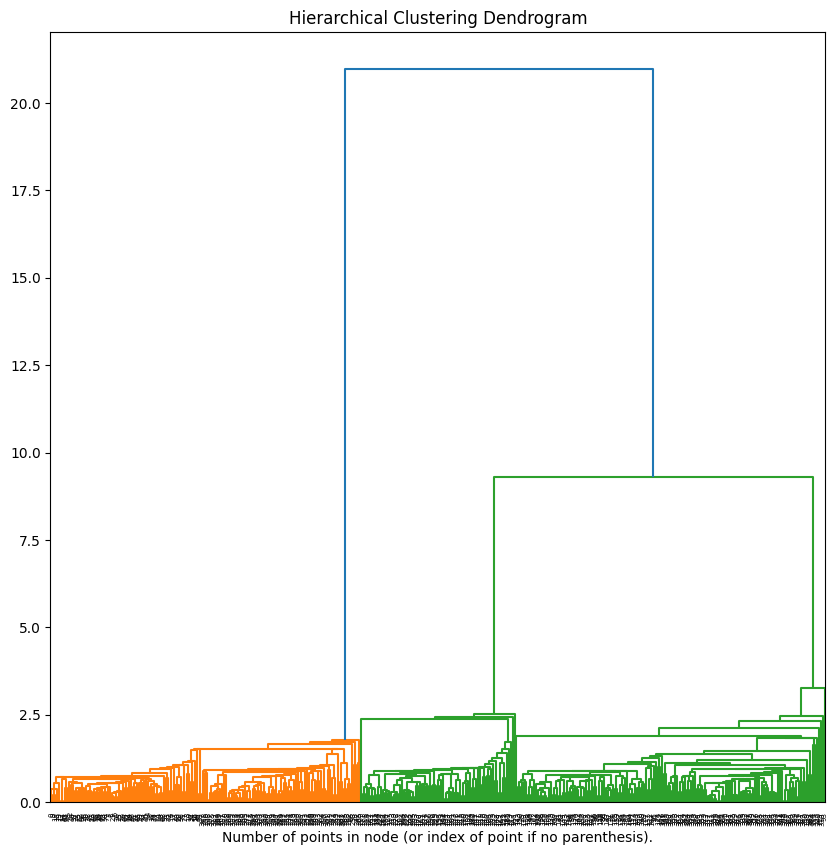

In [159]:
dendogram(data_subcluster,link="single")

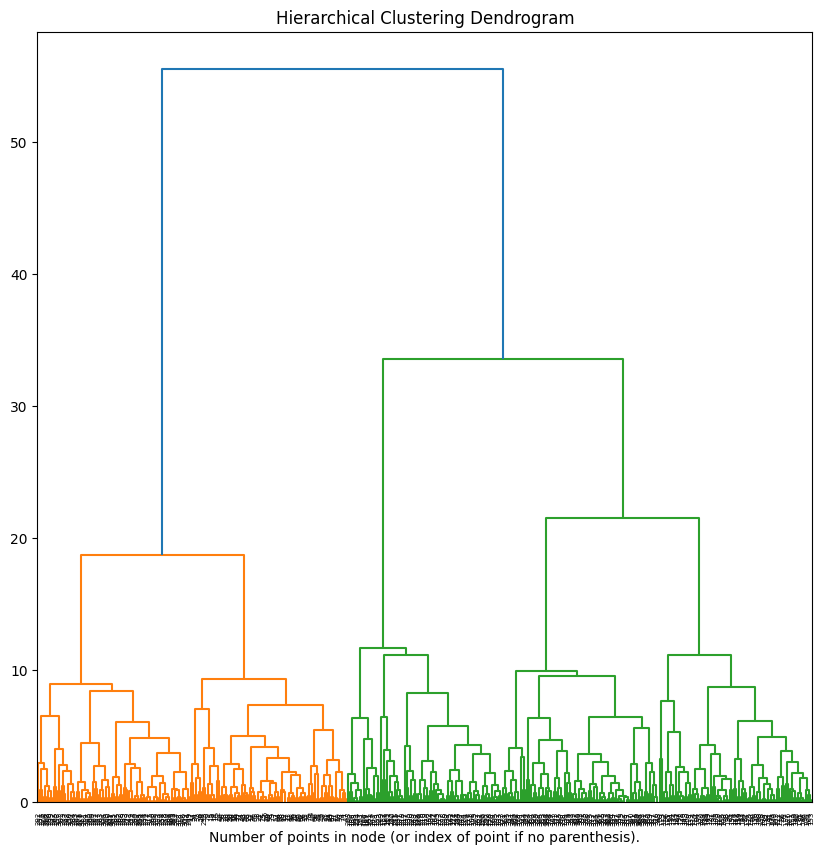

In [160]:
dendogram(data_subcluster,link="complete")

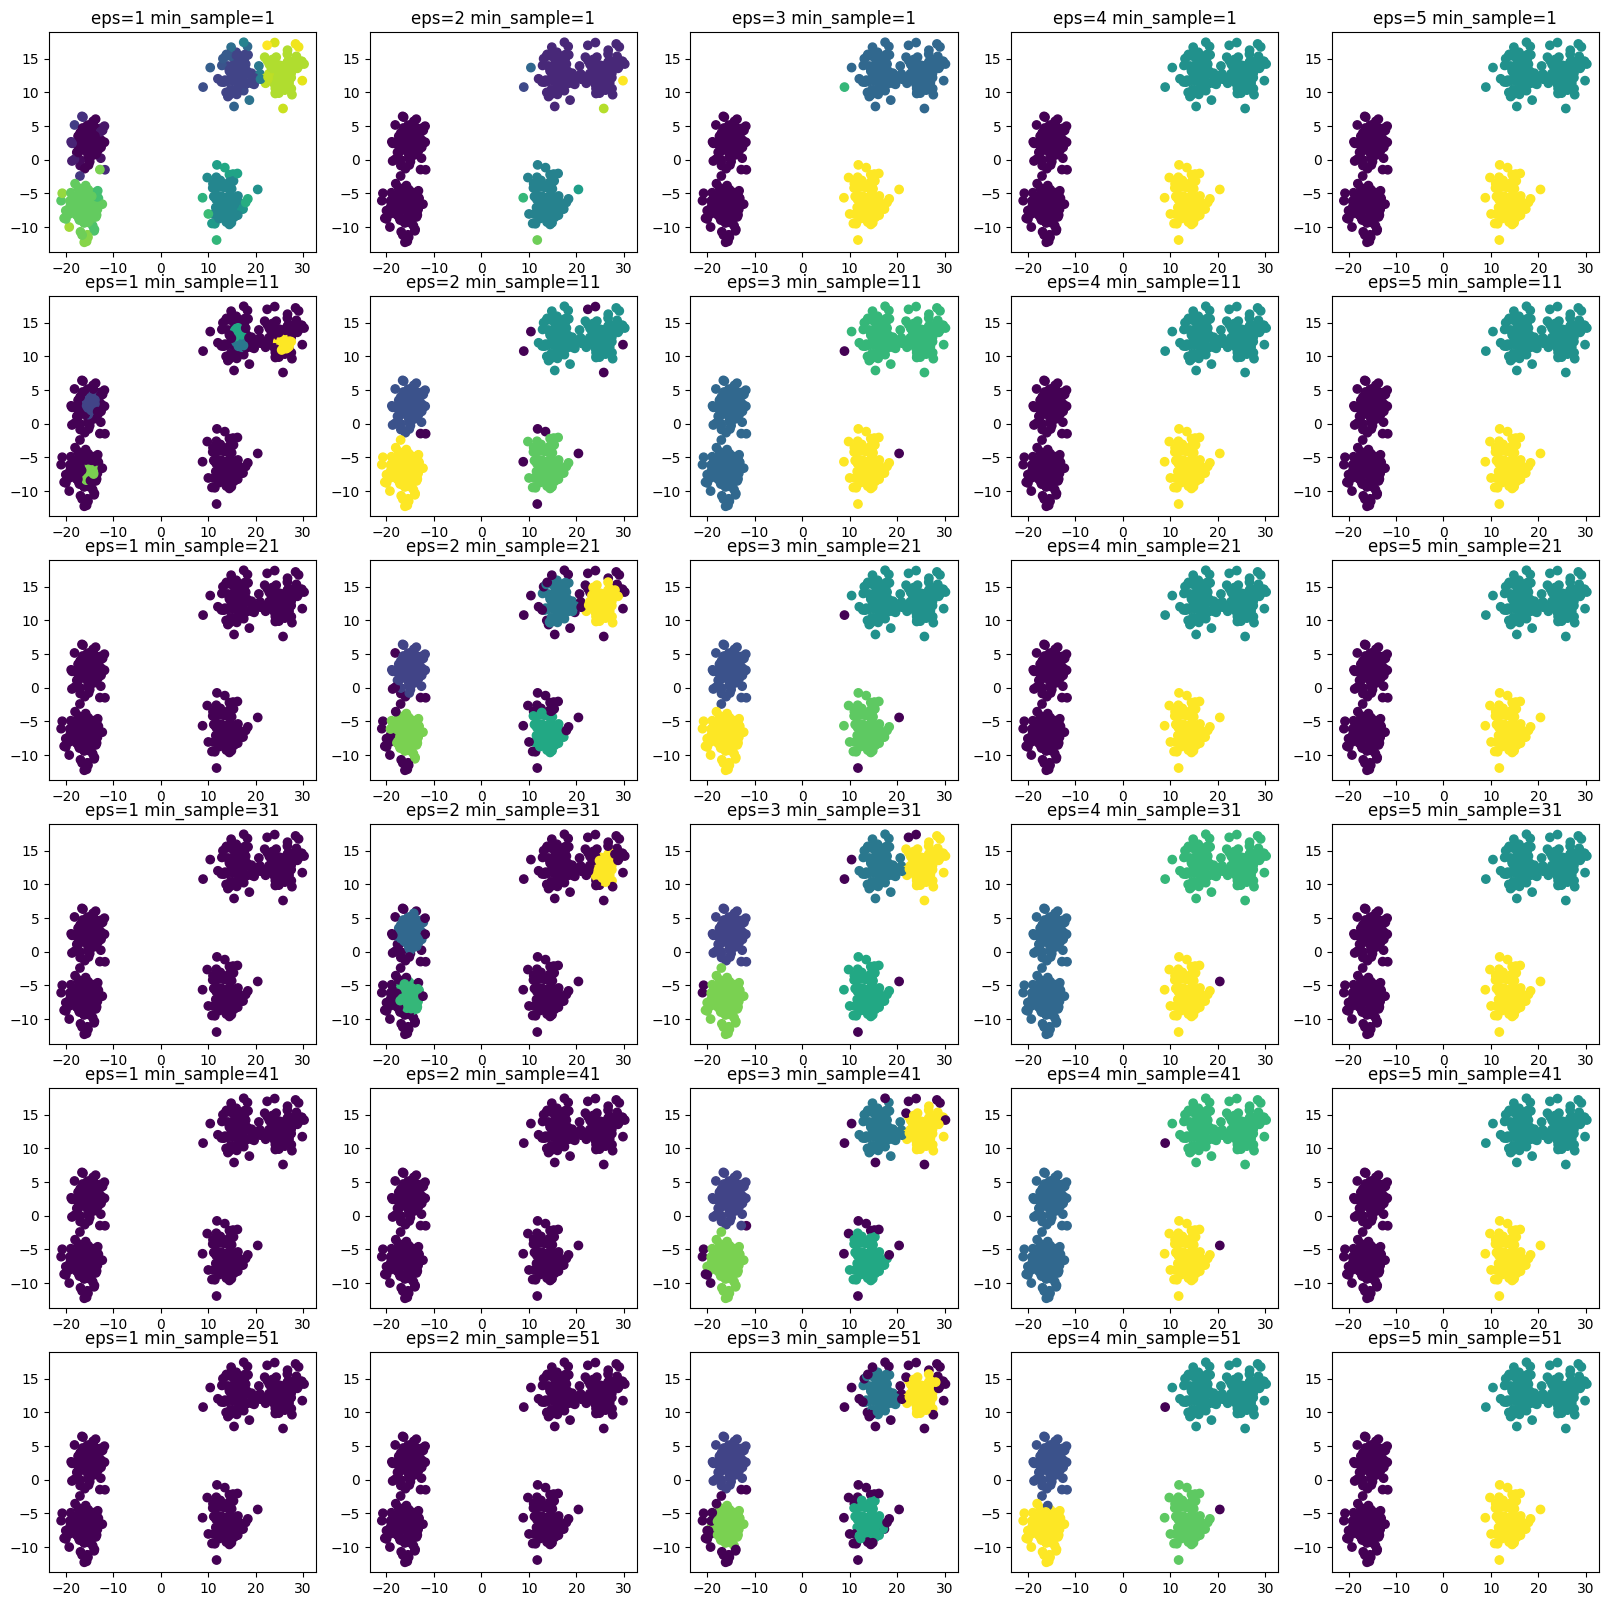

In [161]:
from sklearn.cluster import DBSCAN
ep=[1,2,3,4,5]
min_s=[1,11,21,31,41,51]
f, ax=plt.subplots(6,5,figsize=(20,20))
for idx1,i in enumerate(ep):
  for idx2,j in enumerate(min_s):

    clustering = DBSCAN(eps=i, min_samples=j).fit(data_subcluster)
    ax[idx2][idx1].scatter(data_subcluster['x1'],data_subcluster['x2'],c=clustering.labels_)
    ax[idx2][idx1].set_title("eps="+str(i)+" min_sample="+str(j))
plt.show()

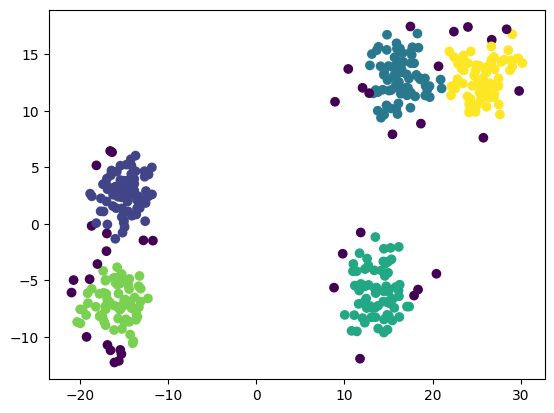

In [162]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.5, min_samples=7).fit(data_subcluster)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['dbscan'].append(metrics.silhouette_score(data_subcluster,clustering.labels_))
ax.scatter(data_subcluster['x1'],data_subcluster['x2'],c=clustering.labels_)
plt.show()
from collections import Counter
outliers['data_subcluster']=Counter(clustering.labels_)[-1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

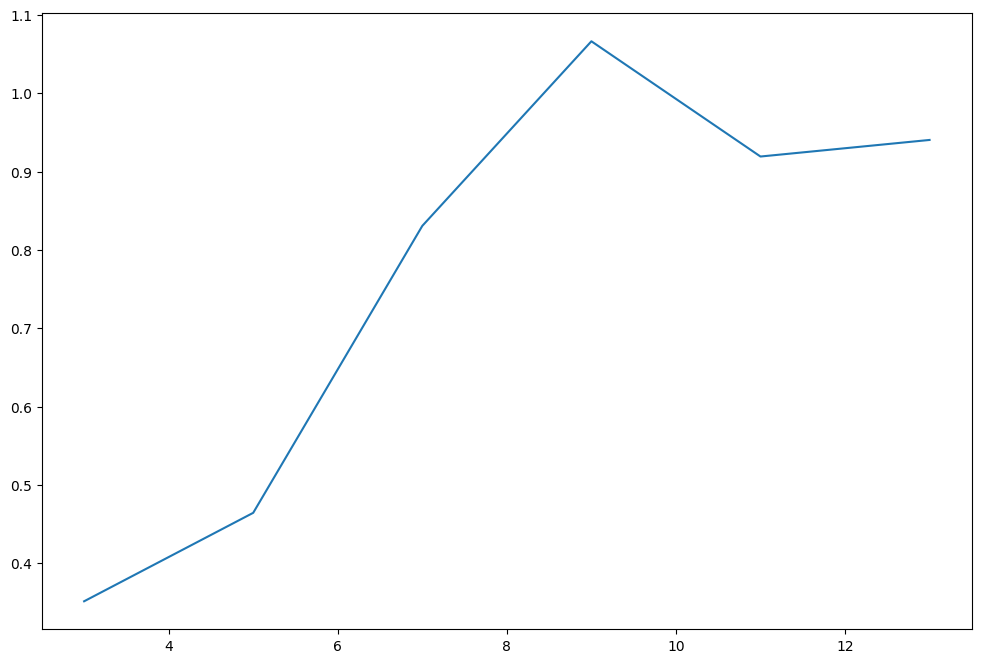

In [163]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_subcluster)
  score.append(davies_bouldin_score(data_subcluster,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

#DATA WELL SEPERATED
Kmeans K=3 performed best

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

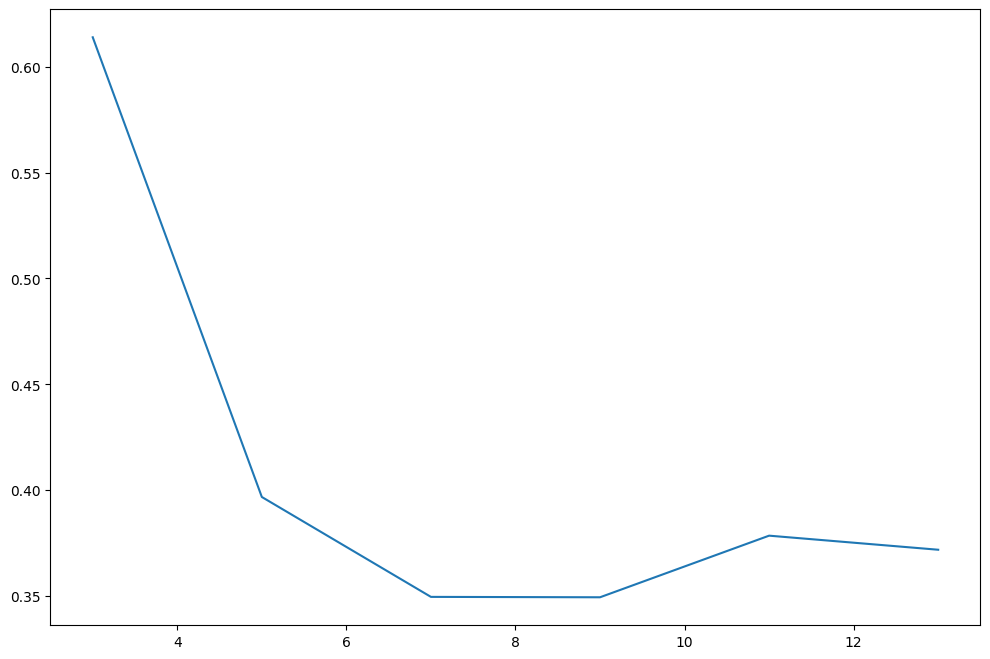

In [164]:
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_wellSeperated)
  score.append(metrics.silhouette_score(data_wellSeperated,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


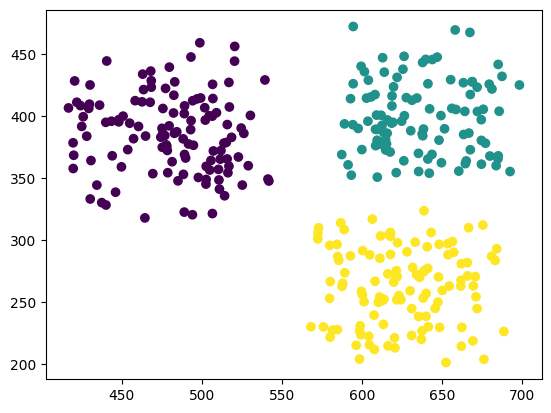

In [165]:
kmeans = KMeans(n_clusters=3,init='random',random_state=42).fit(data_wellSeperated)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['kmeans'].append(metrics.silhouette_score(data_wellSeperated,kmeans.labels_))
ax.scatter(data_wellSeperated['x1'],data_wellSeperated['x2'],c=kmeans.labels_)
plt.show()

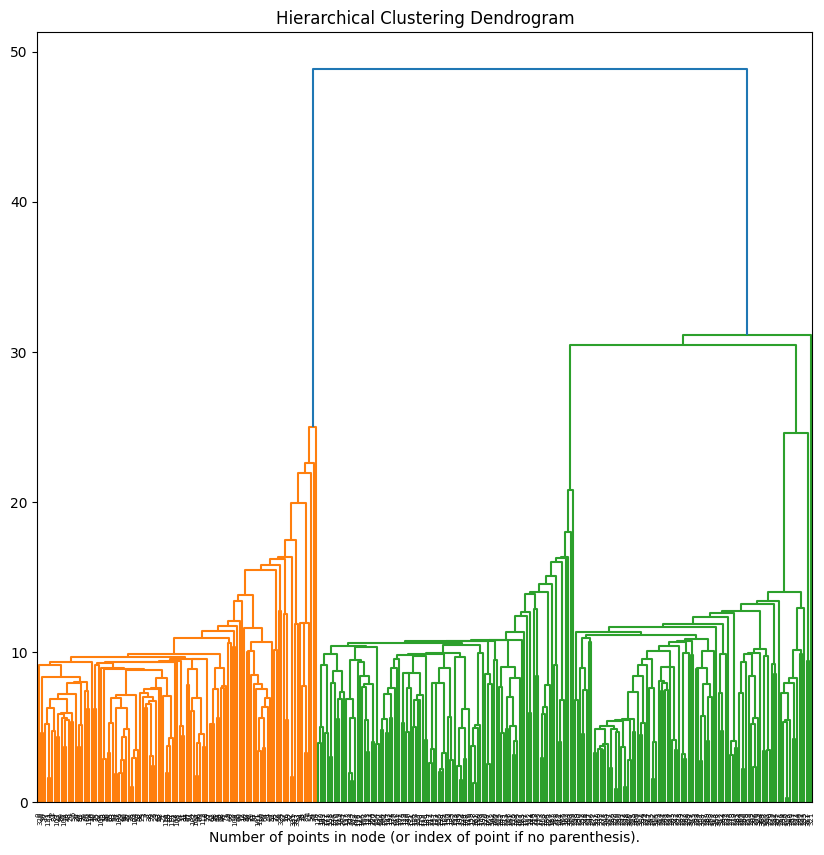

In [166]:
dendogram(data_wellSeperated,link="single")

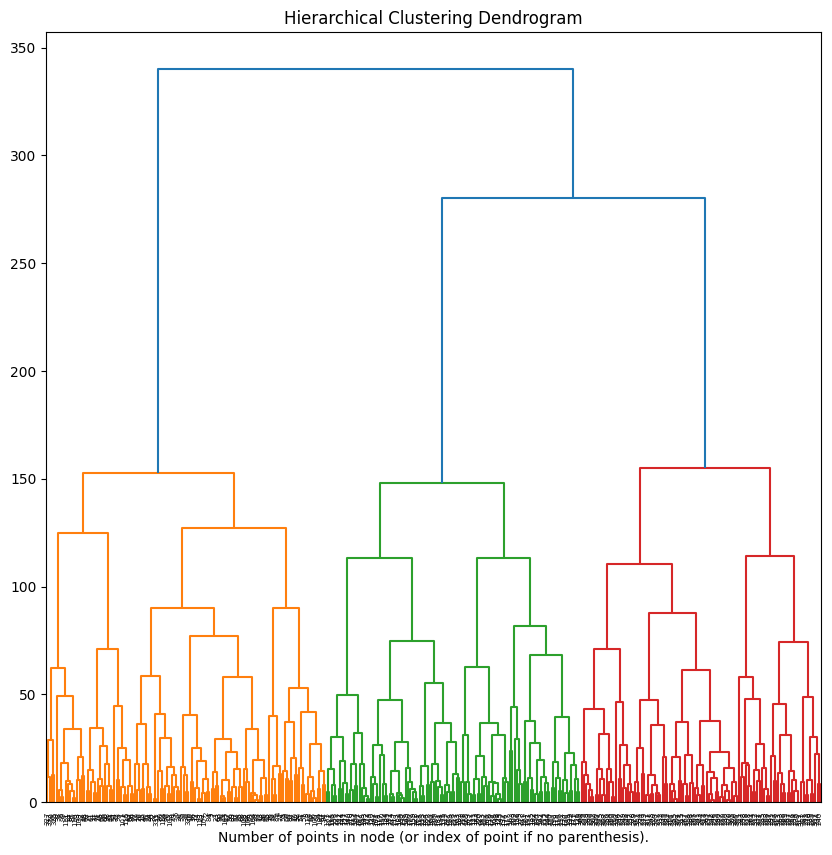

In [167]:
dendogram(data_wellSeperated,link="complete")

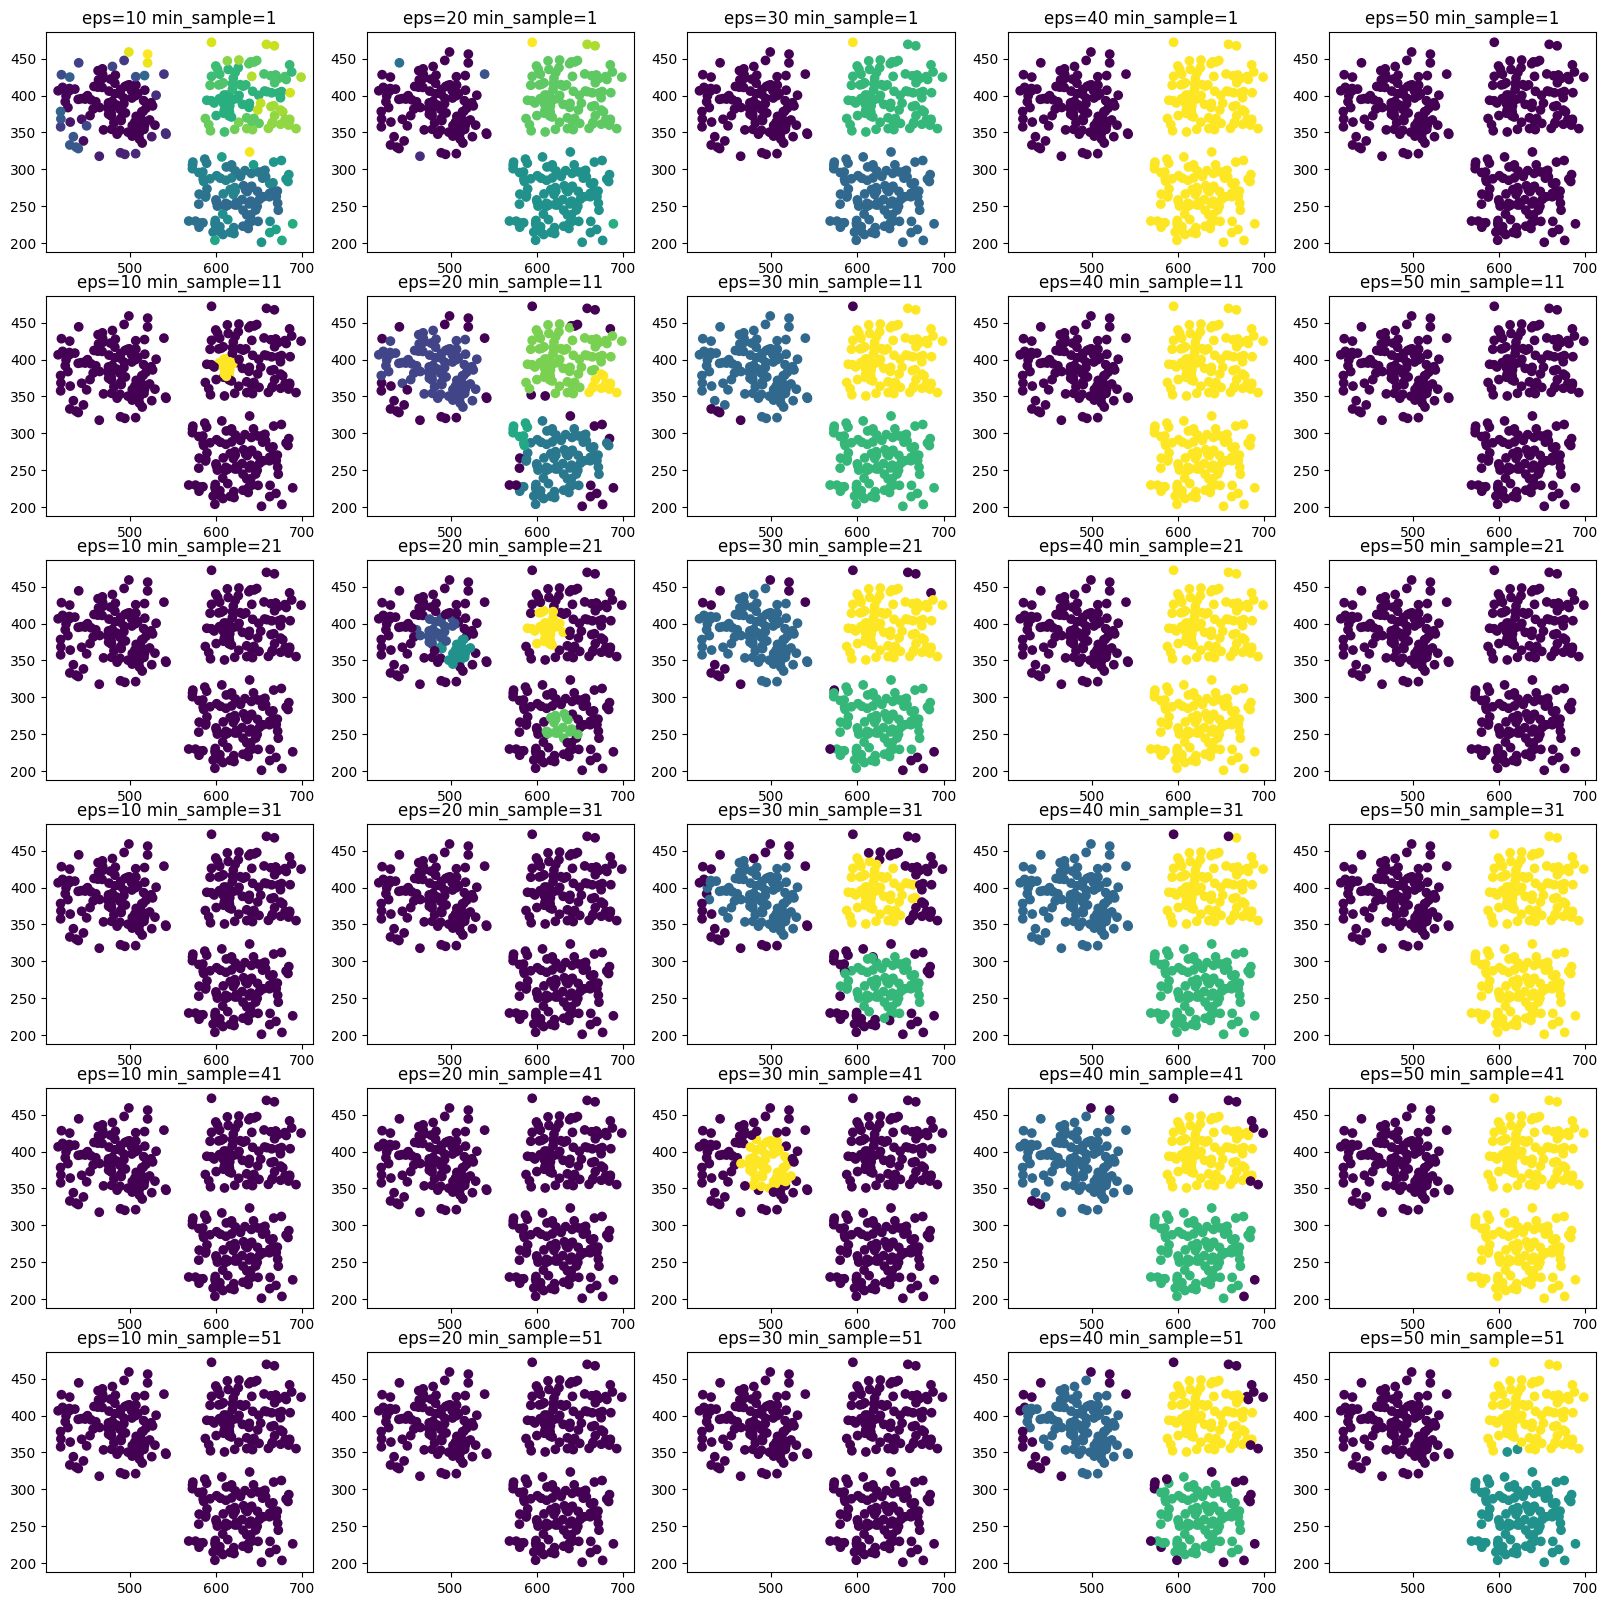

In [173]:
from sklearn.cluster import DBSCAN
ep=[10,20,30,40,50]
min_s=[1,11,21,31,41,51]
f, ax=plt.subplots(6,5,figsize=(20,20))
for idx1,i in enumerate(ep):
  for idx2,j in enumerate(min_s):

    clustering = DBSCAN(eps=i, min_samples=j).fit(data_wellSeperated)
    ax[idx2][idx1].scatter(data_wellSeperated['x1'],data_wellSeperated['x2'],c=clustering.labels_)
    ax[idx2][idx1].set_title("eps="+str(i)+" min_sample="+str(j))
plt.show()

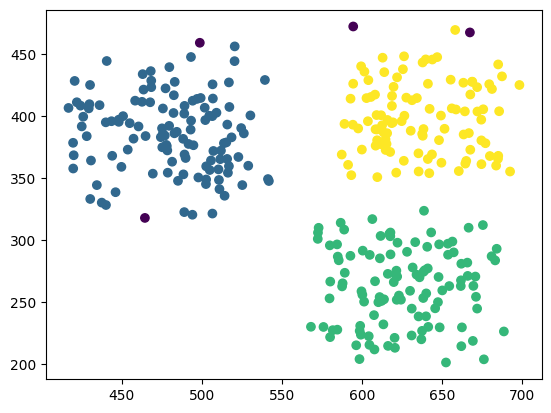

In [169]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=25, min_samples=5).fit(data_wellSeperated)
fig = plt.figure()
ax = fig.add_subplot()
s_scores['dbscan'].append(metrics.silhouette_score(data_wellSeperated,clustering.labels_))
ax.scatter(data_wellSeperated['x1'],data_wellSeperated['x2'],c=clustering.labels_)
plt.show()
from collections import Counter
outliers['data_wellSeperated']=Counter(clustering.labels_)[-1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

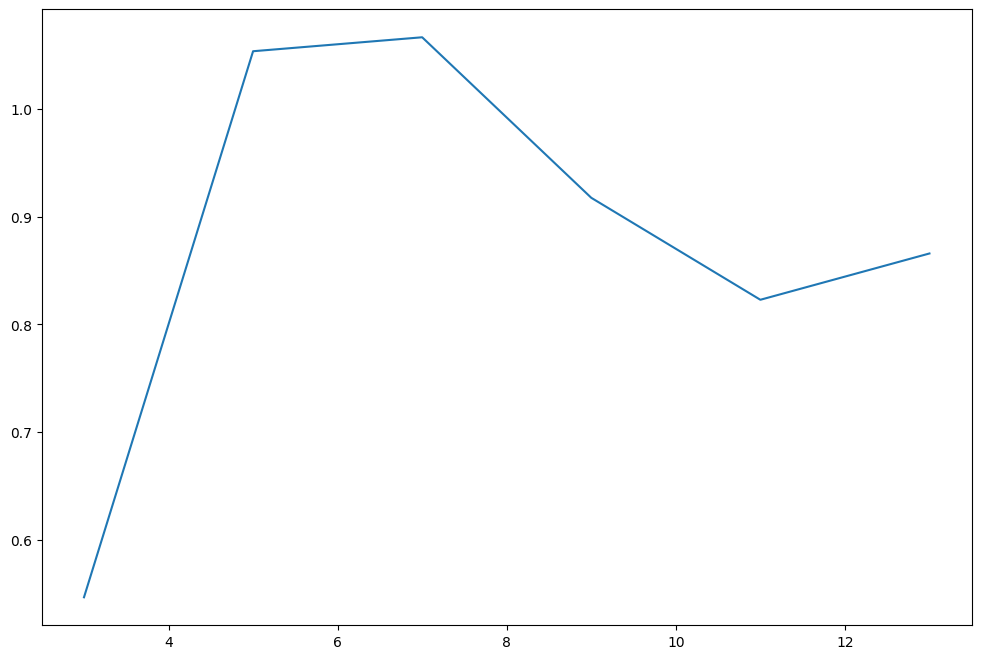

In [170]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  kmeans = KMeans(n_clusters=i,init='random',random_state=42).fit(data_wellSeperated)
  score.append(davies_bouldin_score(data_wellSeperated,kmeans.labels_))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

# TABULATION

**Outliers**

In [171]:
pd.DataFrame.from_dict({"data_set":list(outliers.keys()),"count":list(outliers.values())})

data_set  count
0        data_compact      0
1         data_skewed     20
2     data_subcluster     40
3  data_wellSeperated      4

scores of different algos

In [172]:
from collections import OrderedDict
s_scores["data_set"]=list(outliers.keys())
pd.DataFrame.from_dict(OrderedDict(sorted(s_scores.items())))

data_set    dbscan    kmeans
0        data_compact  0.911780  0.911780
1         data_skewed  0.423632  0.386116
2     data_subcluster  0.550157  0.668831
3  data_wellSeperated  0.557841  0.613946